In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import cosine_distances
from pycpd import RigidRegistration, DeformableRegistration, AffineRegistration
from functools import partial
%matplotlib inline

In [2]:
classes_highres = pd.read_csv("classes_highres144_in_highlow_144.csv", header = None)
classes_highres.columns = ['identity']

embeddings_highres = pd.read_csv("emb_highres144_in_highlow_144.csv", header = None)

In [3]:
classes_highres.head()

,identity
0,0
1,0
2,0
3,0
4,1


In [4]:
embeddings_highres.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1.407634,-2.209069,-1.350710,-0.358116,-0.028822,0.614775,-1.365405,0.707847,-1.312175,0.907132,...,-0.230720,0.990342,1.182684,-0.311843,0.090139,1.516376,-1.834717,1.434276,-0.599627,-0.816431
1,1.231538,0.552287,-1.738574,0.599045,-0.707960,0.591156,-1.503976,-0.307874,-1.162233,0.756078,...,0.584035,0.379183,1.013806,-2.624349,-1.238465,1.494769,-0.779375,-1.425003,-1.831228,-1.143299
2,-0.572044,-0.614195,0.136195,-1.247965,1.742074,1.030948,-1.571627,0.343673,-1.845764,1.372392,...,0.491010,-0.166160,1.171258,0.282302,-0.804752,0.992953,-0.750760,0.301655,-1.167012,-1.553835
3,0.637111,-1.108262,-0.551173,-2.257423,1.403016,1.278196,-1.124724,0.357462,-2.460172,0.874093,...,1.044582,0.984509,0.632652,-0.238402,0.466634,1.686092,-1.029643,0.681647,-2.499145,-1.644781
4,0.316326,-1.600687,0.125714,-0.062978,0.852266,-0.172997,0.584307,1.012361,-0.154471,-1.735099,...,0.110045,0.690208,1.531103,0.009911,-1.506751,1.710724,-1.153603,0.801146,-0.561749,1.224625


In [5]:
classes_highres_downup = pd.read_csv("classes_highres32_in_highlow_144.csv", header = None)
classes_highres_downup.columns = ['identity']

embeddings_highres_downup = pd.read_csv("emb_highres32_in_highlow_144.csv", header = None)

In [6]:
classes_highres_downup.head()

,identity
0,0
1,0
2,0
3,0
4,1


In [7]:
embeddings_highres_downup.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.518422,-1.514498,-1.640607,-0.613649,-1.144987,0.434792,-1.722585,0.308933,-2.512892,0.367009,...,0.060455,0.687964,0.993428,-0.861614,-0.205590,1.476147,0.286726,0.481346,-0.966408,-0.581282
1,0.732458,0.246063,-1.588826,1.205205,-1.304047,1.449345,-2.526360,-0.549763,-2.386415,0.406992,...,1.234464,-0.076553,0.065547,-2.466874,-1.136387,1.086929,0.640685,-1.462132,-1.864834,-0.991799
2,-1.735165,0.820481,0.006882,-0.537363,0.337434,2.428917,-2.323510,0.281361,-1.792913,1.029527,...,0.614474,-0.517104,1.263717,-0.576509,-1.596547,0.157070,0.370144,0.342474,-1.169282,-1.254825
3,-0.483349,-1.586930,-0.364454,-1.537543,-0.083216,3.052452,-2.173104,-0.127344,-3.017556,-0.394956,...,1.149340,0.762332,0.690313,-0.516438,-0.055369,2.070269,0.429943,0.374006,-1.421773,-0.281701
4,-1.129060,-1.740437,0.122480,-0.402059,-0.992214,0.273780,0.089711,1.087653,0.238915,-2.470379,...,0.617197,-0.565937,1.507833,0.508785,-1.818698,0.470462,-0.280800,0.017351,0.222636,1.799114


In [8]:
all_embeddings = pd.concat([embeddings_highres, embeddings_highres_downup], axis= 0, ignore_index = True)
all_classes = pd.concat([classes_highres, classes_highres_downup], axis= 0, ignore_index = True)

In [9]:
pca_highres = PCA(n_components=3)
pca_highres_downup = PCA(n_components=3)
pca_all = PCA(n_components=3)

pca_highres_3 = pca_highres.fit_transform(embeddings_highres)
pca_highres_downup_3 = pca_highres.fit_transform(embeddings_highres_downup)
pca_all_3 = pca_all.fit_transform(all_embeddings)

In [10]:
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

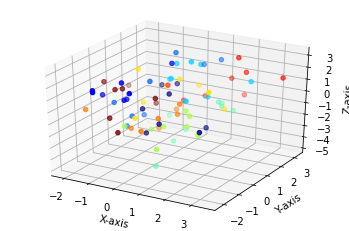

Sum cosine distance 308.7751749990928 Mean cosine distance: 0.6175503499981857


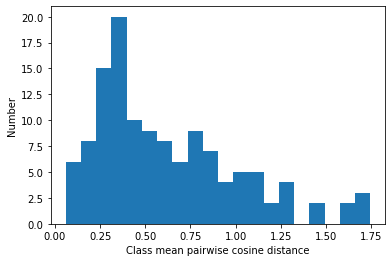

In [11]:
# SEPARATE PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_highres_3[:nb_class,0]
y_highres = pca_highres_3[:nb_class,1]
z_highres  = pca_highres_3[:nb_class,2]

x_highres_downup  = pca_highres_downup_3[:nb_class,0]
y_highres_downup  = pca_highres_downup_3[:nb_class,1]
z_highres_downup  = pca_highres_downup_3[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = classes_highres[:nb_class], cmap=cmap)
ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = classes_highres_downup[:nb_class], cmap=cmap)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_highres_3[:500],pca_highres_downup_3[:500])
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
print("Sum cosine distance", sum(distances), "Mean cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

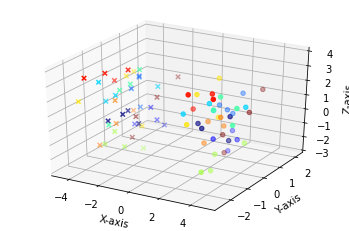

Sum pairwise cosine distance 665.9983987727504 Mean pairwise cosine distance: 1.331996797545501


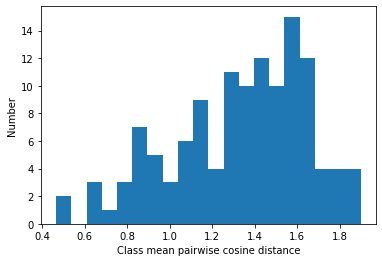

In [12]:
# COMBINED PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_all_3[:nb_class,0]
y_highres = pca_all_3[:nb_class,1]
z_highres  = pca_all_3[:nb_class,2]

middle_point = int(pca_all_3.shape[0]/2)

x_highres_downup  = pca_all_3[middle_point:middle_point + nb_class,0]
y_highres_downup  = pca_all_3[middle_point:middle_point + nb_class,1]
z_highres_downup  = pca_all_3[middle_point:middle_point +nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = all_classes[:nb_class], cmap=cmap, marker = 'o')

ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = all_classes[middle_point:middle_point +nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_all_3[:500],pca_all_3[middle_point:middle_point + 500])
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

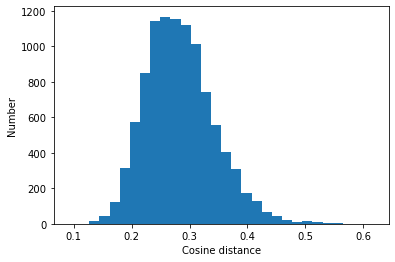

In [13]:
# COSINE DISTANCE FULL EMBEDDINGS
cos_distance_embeddings = cosine_distances(embeddings_highres, embeddings_highres_downup)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Cosine distance')
plt.show()

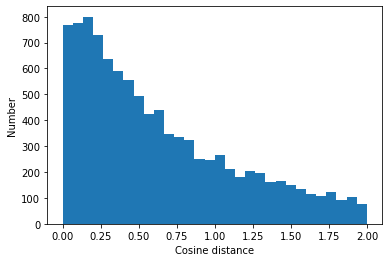

In [14]:
# COSINE DISTANCE SEPARATE PCA
cos_distance_embeddings = cosine_distances(pca_highres_3,pca_highres_downup_3)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Cosine distance')
plt.show()

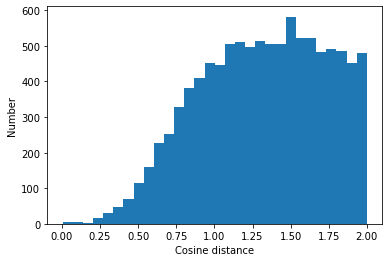

In [15]:
# COSINE DISTANCE COMBINED PCA
middle_point = int(pca_all_3.shape[0]/2)
cos_distance_embeddings = cosine_distances(pca_all_3[:middle_point],pca_all_3[middle_point:])
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Cosine distance')
plt.show()

In [16]:
def visualize(iteration, error, X, Y, ax):
    plt.cla()
    ax.scatter(X[:, 0],  X[:, 1], X[:, 2], color='red', label='Target')
    ax.scatter(Y[:, 0],  Y[:, 1], Y[:, 2], color='blue', label='Source')
    ax.text2D(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
        iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
    ax.legend(loc='upper left', fontsize='x-large')
    plt.draw()

RIGID REGISTRATION ON SEPARATE PCA


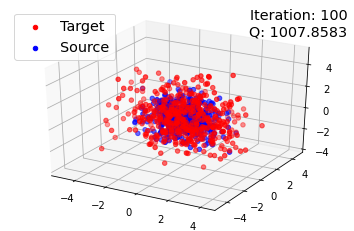

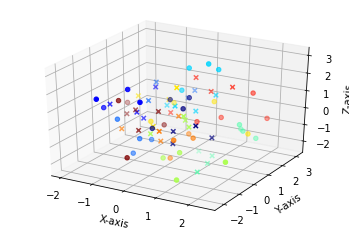

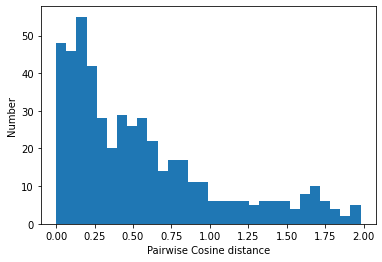

Sum pairwise cosine distance 277.695778015006 Mean pairwise cosine distance: 0.555391556030012


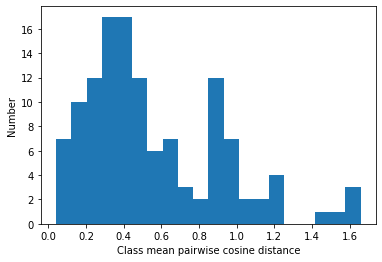

RIGID REGISTRATION ON COMBINED PCA


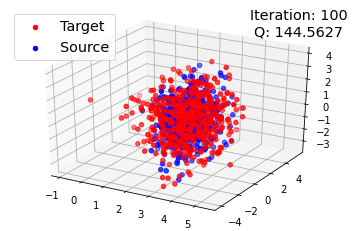

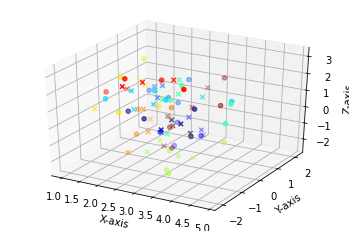

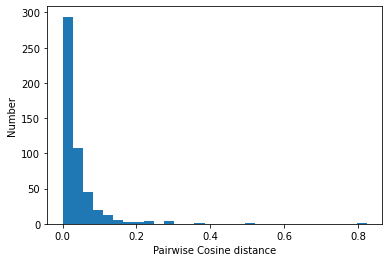

Sum pairwise cosine distance 19.336159454319038 Mean pairwise cosine distance: 0.03867231890863808


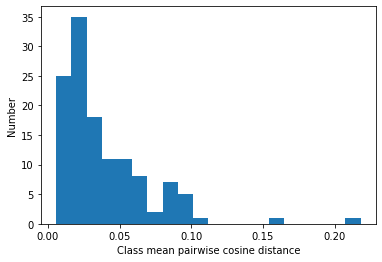

In [17]:
print("RIGID REGISTRATION ON SEPARATE PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

rigid_reg = RigidRegistration(**{'X': pca_highres_3[:500], 'Y': pca_highres_downup_3[:500]})
rigid_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_highres_3[:nb_class,0]
y_highres = pca_highres_3[:nb_class,1]
z_highres  = pca_highres_3[:nb_class,2]

x_highres_downup  = rigid_reg.TY[:nb_class,0]
y_highres_downup  = rigid_reg.TY[:nb_class,1]
z_highres_downup  = rigid_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = classes_highres[:nb_class], cmap=cmap, marker = 'o')

ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = classes_highres_downup[:nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_highres_3[:500], rigid_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

print("RIGID REGISTRATION ON COMBINED PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

rigid_reg = RigidRegistration(**{'X': pca_all_3[:500], 'Y': pca_all_3[middle_point:middle_point + 500]})
rigid_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_all_3[:nb_class,0]
y_highres = pca_all_3[:nb_class,1]
z_highres  = pca_all_3[:nb_class,2]

x_highres_downup  = rigid_reg.TY[:nb_class,0]
y_highres_downup  = rigid_reg.TY[:nb_class,1]
z_highres_downup  = rigid_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = all_classes[:nb_class], cmap=cmap, marker = 'o')
ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = all_classes[middle_point:middle_point +nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_all_3[:500],rigid_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()



DEFORMABLE REGISTRATION ON SEPARATE PCA


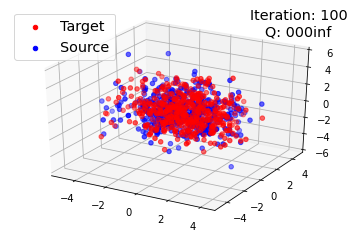

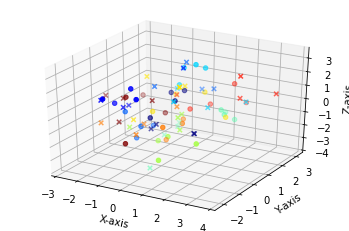

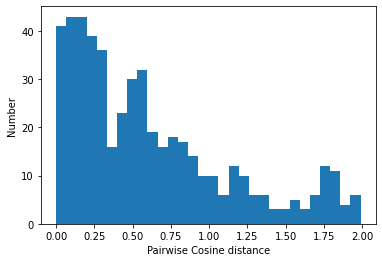

Sum pairwise cosine distance 305.49837096665846 Mean pairwise cosine distance: 0.6109967419333169


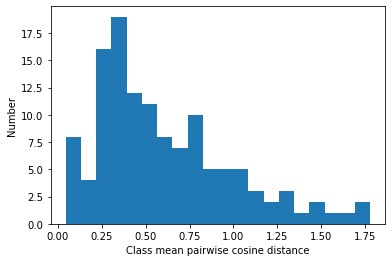

DEFORMABLE REGISTRATION ON COMBINED PCA


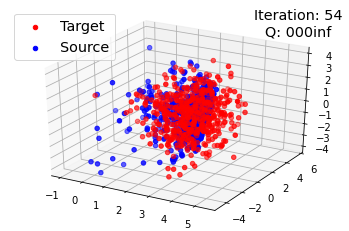

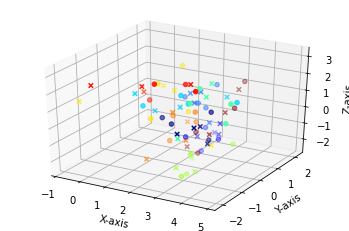

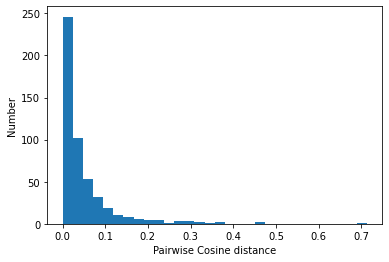

Sum pairwise cosine distance 24.6778642595272 Mean pairwise cosine distance: 0.049355728519054405


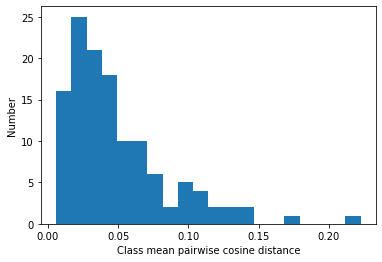

In [18]:
print("DEFORMABLE REGISTRATION ON SEPARATE PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

deform_reg = DeformableRegistration(**{'X': pca_highres_3[:500], 'Y': pca_highres_downup_3[:500]})
deform_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_highres_3[:nb_class,0]
y_highres = pca_highres_3[:nb_class,1]
z_highres  = pca_highres_3[:nb_class,2]

x_highres_downup  = deform_reg.TY[:nb_class,0]
y_highres_downup  = deform_reg.TY[:nb_class,1]
z_highres_downup  = deform_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = classes_highres[:nb_class], cmap=cmap, marker = 'o')

ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = classes_highres_downup[:nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_highres_3[:500], deform_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

print("DEFORMABLE REGISTRATION ON COMBINED PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

deform_reg = DeformableRegistration(**{'X': pca_all_3[:500], 'Y': pca_all_3[middle_point:middle_point + 500]})
deform_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_all_3[:nb_class,0]
y_highres = pca_all_3[:nb_class,1]
z_highres  = pca_all_3[:nb_class,2]

x_highres_downup  = deform_reg.TY[:nb_class,0]
y_highres_downup  = deform_reg.TY[:nb_class,1]
z_highres_downup  = deform_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = all_classes[:nb_class], cmap=cmap, marker = 'o')
ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = all_classes[middle_point:middle_point +nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_all_3[:500],deform_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

AFFINE REGISTRATION ON SEPARATE PCA


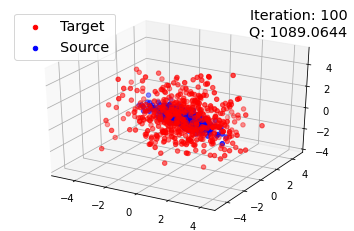

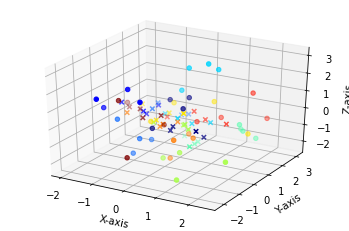

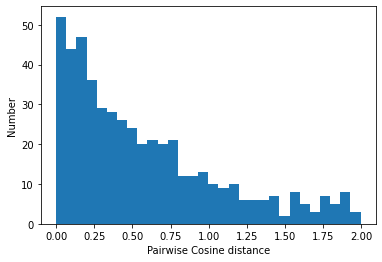

Sum pairwise cosine distance 288.5812209433412 Mean pairwise cosine distance: 0.5771624418866823


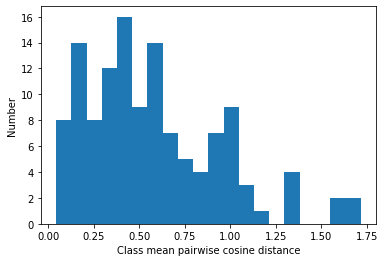

AFFINE REGISTRATION ON COMBINED PCA


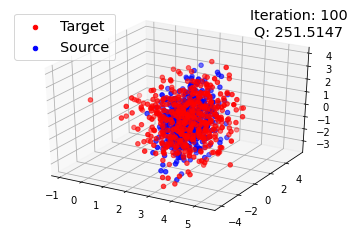

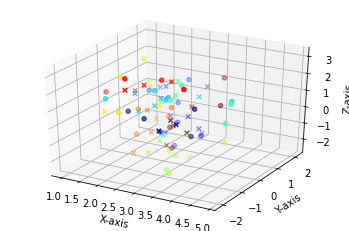

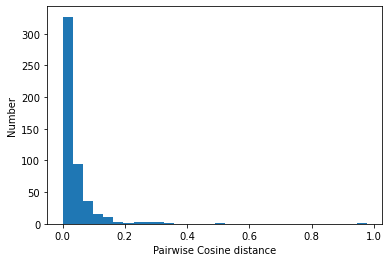

Sum pairwise cosine distance 19.942157678369796 Mean pairwise cosine distance: 0.03988431535673959


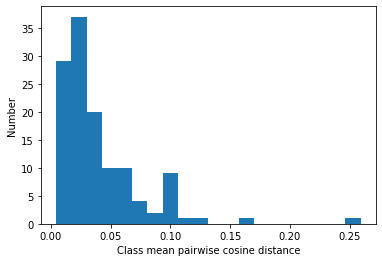

In [19]:
print("AFFINE REGISTRATION ON SEPARATE PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

affine_reg = AffineRegistration(**{'X': pca_highres_3[:500], 'Y': pca_highres_downup_3[:500]})
affine_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_highres_3[:nb_class,0]
y_highres = pca_highres_3[:nb_class,1]
z_highres  = pca_highres_3[:nb_class,2]

x_highres_downup  = affine_reg.TY[:nb_class,0]
y_highres_downup  = affine_reg.TY[:nb_class,1]
z_highres_downup  = affine_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = classes_highres[:nb_class], cmap=cmap, marker = 'o')

ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = classes_highres_downup[:nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_highres_3[:500], affine_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

print("AFFINE REGISTRATION ON COMBINED PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

affine_reg = AffineRegistration(**{'X': pca_all_3[:500], 'Y': pca_all_3[middle_point:middle_point + 500]})
affine_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_all_3[:nb_class,0]
y_highres = pca_all_3[:nb_class,1]
z_highres  = pca_all_3[:nb_class,2]

x_highres_downup  = affine_reg.TY[:nb_class,0]
y_highres_downup  = affine_reg.TY[:nb_class,1]
z_highres_downup  = affine_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = all_classes[:nb_class], cmap=cmap, marker = 'o')
ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = all_classes[middle_point:middle_point +nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_all_3[:500],affine_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

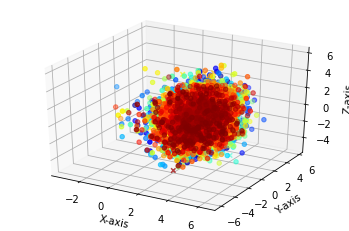

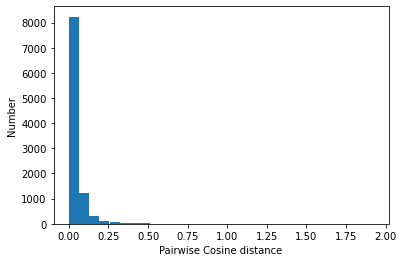

Sum pairwise cosine distance 421.2530307600117 Mean pairwise cosine distance: 0.04212530307600117


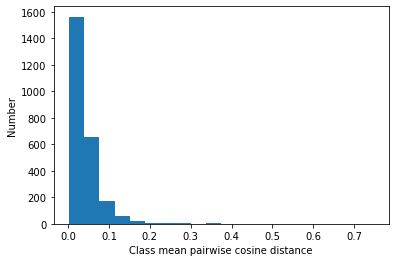

In [20]:
# TRANSFORMATION OF OTHER POINTS BASED ON AFFINE REGISTRATION ON COMBINED PCA

transformed_all_pca3_downup = affine_reg.transform_point_cloud(pca_all_3[middle_point:])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_highres  = pca_all_3[:middle_point,0]
y_highres = pca_all_3[:middle_point,1]
z_highres  = pca_all_3[:middle_point,2]

x_highres_downup  = transformed_all_pca3_downup[:,0]
y_highres_downup  = transformed_all_pca3_downup[:,1]
z_highres_downup  = transformed_all_pca3_downup[:,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = classes_highres, cmap=cmap, marker = 'o')

ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = classes_highres_downup, cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_all_3[:middle_point], transformed_all_pca3_downup)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(middle_point / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()
